In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random
import os
import torch
import sys
sys.path.append('../..')
from modules.many_features import utils, lupus_constants
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [273]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
torch.manual_seed(SEED)
torch.use_deterministic_algorithms(True)

#### The Data

In [274]:
# df = pd.read_csv('../../data/more_features/more_feats_correlated_0.1.csv')
# df = df.fillna(-1)
# df.head()

In [275]:
#train_df = pd.read_csv('../../final/data/train_set_basic.csv')
#train_df.head()

In [276]:
#train_df.iloc[0]

In [277]:
# test_df = pd.read_csv('../../final/data/test_set_constant.csv')
# test_df = pd.read_csv('../../lupus_trial/data/anemia/test_set_constant.csv')
test_df = pd.read_csv('../../../anemia_ml4hc/data/test_set_constant.csv')
# test_df = pd.read_csv('../../../anemia_ml4hc/data/val_set_constant.csv')
test_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,gender,creatinine,cholestrol,copper,ethanol,folate,glucose,hematocrit,tsat,label
0,7.116363,-1.000000,3.781573,2.738413,-1.000000,95.904198,68.457895,2.226085,0,1.892912,39.808550,110.329197,64.404350,21.654404,73.787009,21.349089,-1.000000,5
1,8.125320,92.230003,4.231419,1.188039,143.365567,104.057204,204.747831,2.342554,0,0.652614,13.478089,-1.000000,32.705481,-1.000000,43.520272,24.375961,142.815207,1
2,11.309450,38.324563,-1.000000,-1.000000,455.077909,76.402602,-1.000000,4.440732,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,33.928350,-1.000000,4
3,13.763858,253.513394,2.262606,0.551444,453.772884,82.781943,90.101466,4.987993,0,0.853521,104.005514,34.639227,0.963866,22.083012,88.891838,41.291574,19.856071,0
4,11.464002,-1.000000,-1.000000,-1.000000,320.964653,104.287127,-1.000000,3.297819,0,1.163516,121.616315,105.895897,-1.000000,9.337462,-1.000000,34.392007,-1.000000,7


In [278]:
X_test = test_df.iloc[:, 0:-1]
y_test = test_df.iloc[:, -1]

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((14000, 17), (14000,))

In [279]:
# utils.get_dt_performance(df)

In [280]:
# df.label.value_counts()

In [281]:
# class_dict = constants.CLASS_DICT
# df['label'] = df['label'].replace(class_dict)
# X = df.iloc[:, 0:-1]
# y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
# X_train, y_train = np.array(X_train), np.array(y_train)
# X_test, y_test = np.array(X_test), np.array(y_test)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [282]:
# y_test[:5]

In [283]:
# action_list = list(class_dict) + [col  for col in df.columns if col!='label']
# action_list

In [284]:
# len(action_list)

#### Testing

In [285]:
# training_env = utils.create_env(X_train, y_train)
# dqn_model = utils.load_dqn3('../../models/many_features/0.1/with_correlated_fts/constant_test_set/dqn_missing_1_6000000', 
#                             training_env)
# test_df = utils.evaluate_dqn(dqn_model, X_test, y_test)
# test_df.head()

In [323]:
# dqn_model = utils.load_dqn3('../../../anemia_ml4hc/models/sb/dueling_double_dqn/dddqn_basic_3000000_steps.zip')
dqn_model = utils.load_dqn(                                         
    f'../../../anemia_ml4hc/models/sb/new_different_training_sizes/dqn_pr_train_set_0.5_42_15000000.pkl')
# dqn_model = utils.load_dqn3('../../final/models/dqn_noisy_6_missing_3_21300000')
test_df = utils.evaluate_dqn(dqn_model, X_test, y_test)
test_df.head()

Using just stable baselines (not 3)
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Testing done.....


,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success
0,0.0,4.0,1.0,5.0,5.0,"[hemoglobin, rbc, ret_count, Hemolytic anemia]",0.0,1.0
1,1.0,4.0,1.0,1.0,1.0,"[hemoglobin, rbc, segmented_neutrophils, Vitam...",0.0,1.0
2,2.0,7.0,-1.0,7.0,4.0,"[hemoglobin, rbc, ferritin, gender, hematocrit...",1.0,0.0
3,3.0,2.0,1.0,0.0,0.0,"[hemoglobin, No anemia]",0.0,1.0
4,4.0,4.0,-1.0,7.0,7.0,"[hemoglobin, rbc, segmented_neutrophils, Incon...",1.0,1.0


In [324]:
success_rate, success_df = utils.success_rate(test_df)
success_rate

95.97857142857143

In [325]:
test_df[test_df.episode_length==test_df.episode_length.min()].iloc[-1]['trajectory']

['hemoglobin', 'No anemia']

In [326]:
test_df.episode_length.min(), test_df.episode_length.max()

(2.0, 7.0)

In [327]:
# test_df[test_df.episode_length == test_df.episode_length.max()]

In [328]:
avg_length, avg_return = utils.get_avg_length_reward(test_df)
avg_length, avg_return

(3.980785714285714, 0.7521428571428571)

In [329]:
acc, f1, roc_auc = utils.test(test_df['y_actual'], test_df['y_pred'])
acc, f1, roc_auc

(95.97857142857143, 95.71305761954258, 97.53899259621319)

test_df.y_pred.value_counts()

#### Saving files

In [970]:
test_df.to_csv(f'../../../anemia_ml4hc/test_dfs/dqn_pr_test_df_15000000.csv', index=False)
# success_df.to_csv(f'../../lupus_trial/test_dfs/orig/dqn_success_df_9500000.csv', index=False)

In [ ]:
# for steps in [int(9.5e6), int(10e6), int(10.5e6), int(11e6), int(11.5e6), int(12e6), int(12.5e6), int(13e6), int(13.5e6), int(15e6), int(16e6), int(17e6), int(18e6), int(19e6), int(20e6), int(21e6), int(22e6), int(23e6), int(24e6)]:
#     training_env = utils.create_env(X_train, y_train)
#     dqn_model = utils.load_dqn3(f'../../models/many_features/0.1/with_correlated_fts/dqn3_by_type_noisy_6_{steps}', 
#                                 training_env)
#     test_df = utils.evaluate_dqn(dqn_model, X_test, y_test)
#     success_rate, success_df = utils.success_rate(test_df)
#     avg_length, avg_return = utils.get_avg_length_reward(test_df)
#     print(f'steps: {steps}, success_rate: {success_rate}, avg_length: {avg_length}, avg_return: {avg_return}')

#### Confusion matrix and classification report

In [ ]:
# test_df = pd.read_csv('../../test_dfs/many_features/0.1/correlated/test_df3_missing3_12500000.csv')
# test_df.head()

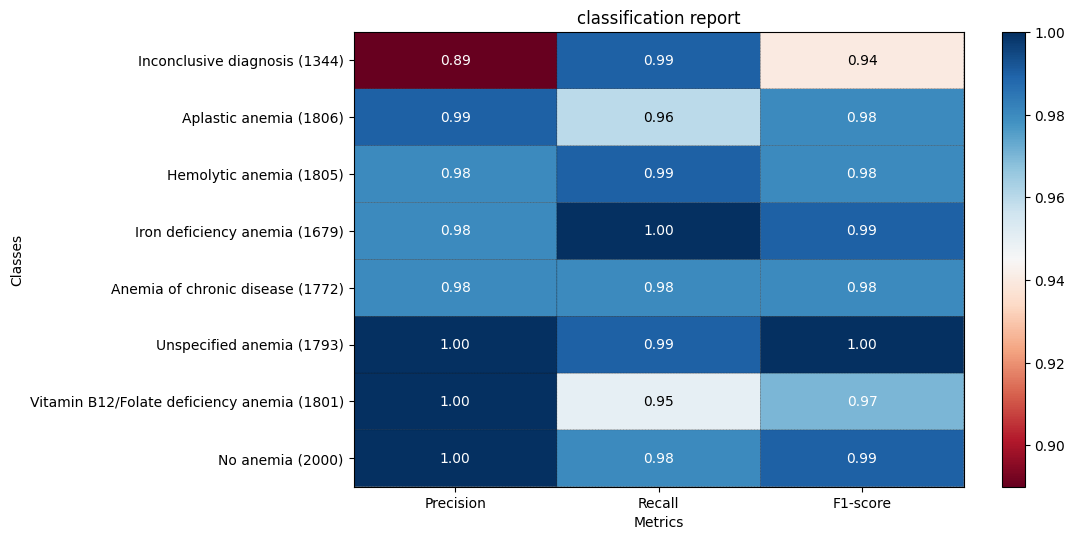

In [971]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

In [972]:
# def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
#     from sklearn.metrics import confusion_matrix
#     cm = confusion_matrix(y_actual, y_pred)
#     cm_df = pd.DataFrame(cm, index = [0, 1, 2, 3, 4, 5, 6], columns = [0, 1, 2, 3, 4, 5, 6], dtype='object')
#     #cm_df = pd.DataFrame(cm, index = constants.CLASS_DICT.keys(), columns = constants.CLASS_DICT.keys())
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm_df, annot=True)
#     plt.title('Confusion Matrix')
#     plt.ylabel('Actual Anemia')
#     plt.xlabel('Predicted Anemia')
#     plt.tight_layout()
#     if save:
#         plt.savefig(filename)
#     plt.show()
#     plt.close()

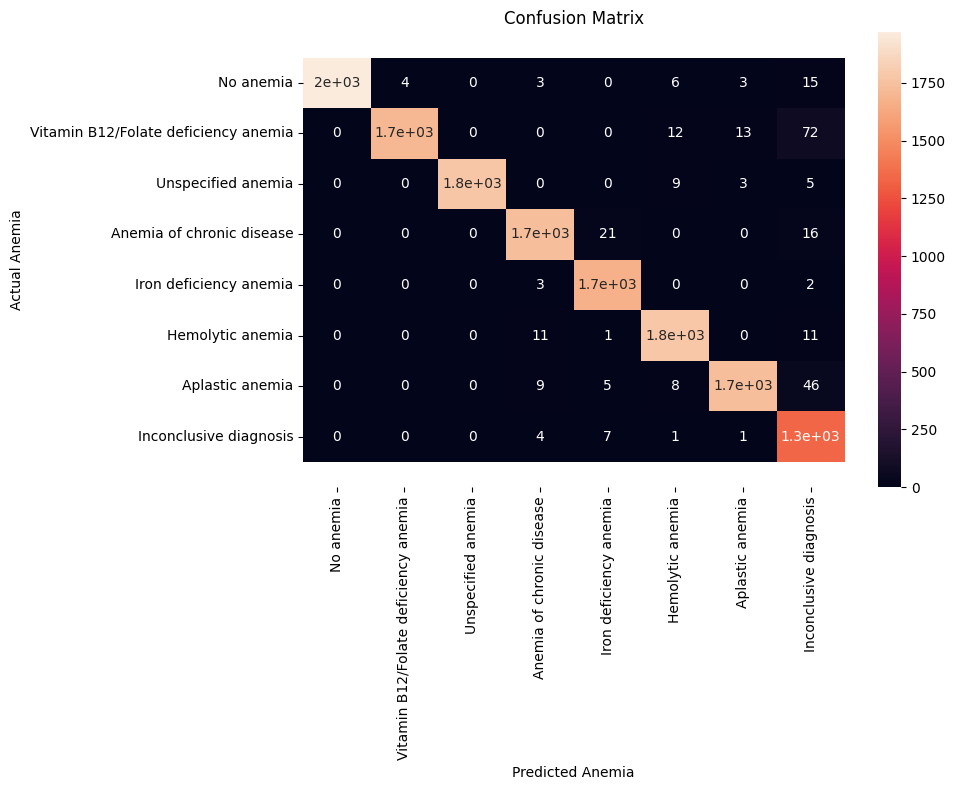

In [973]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])